In [121]:
import numpy as np
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import LabelEncoder,PolynomialFeatures,StandardScaler
from sklearn.model_selection import train_test_split

In [167]:
poly = PolynomialFeatures(degree = 2)
model = LinearRegression()
model2 = LinearRegression()
rd = Ridge()
ls = Lasso()
scaler = StandardScaler()

In [147]:
df = pd.read_csv(r"C:\Users\Yagnesh Narola\Documents\Coding Languages\Artificial Intelligence\Excel_and_CSV\Income Prediction.csv")
df

,age,income,years_of_experience,education_level,hours_per_week,target_salary
0,39.967142,39822.57904,11.741431,PhD,63.185194,55155.50469
1,33.617357,45417.50805,11.416618,Bachelors,54.674125,74080.30805
2,41.476885,41039.28408,5.317401,PhD,51.672805,46083.86871
3,50.230299,51656.27070,12.897921,PhD,54.533842,26354.95807
4,32.658466,NaN,2.549587,Masters,55.048119,30921.35989
...,...,...,...,...,...,...
9995,48.011021,55817.41013,7.113561,Bachelors,33.558220,71669.03864
9996,15.016550,70660.49868,17.223020,PhD,75.365055,41931.48354
9997,27.946833,55675.30954,7.493163,High School,57.408946,24743.61325
9998,39.957656,75702.94594,0.538216,Masters,26.353129,48441.29335


In [148]:
df2 = df.copy()

In [149]:
columns = ['age', 'income', 'years_of_experience', 'education_level','hours_per_week', 'target_salary']
for i in columns:
    df2[i] = df2[i].round()

In [150]:
df2.describe()

,age,income,years_of_experience,hours_per_week,target_salary
count,10000.000000,9000.000000,10000.000000,10000.000000,10000.000000
mean,37.455100,50203.562556,9.937000,49.875400,60063.529900
std,15.447933,15016.048095,4.968028,17.344819,20007.140617
min,-4.000000,-7846.000000,-8.000000,20.000000,-25908.000000
25%,29.000000,40119.250000,6.000000,35.000000,46709.750000
50%,36.000000,50258.000000,10.000000,50.000000,60121.000000
75%,43.000000,60410.750000,13.000000,65.000000,73487.250000
max,144.000000,117186.000000,28.000000,80.000000,130731.000000


<Axes: ylabel='age'>

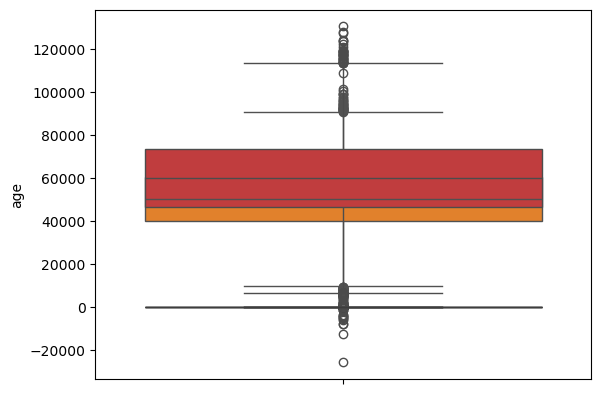

In [151]:
sns.boxplot(df['age'])
sns.boxplot(df['income'])
sns.boxplot(df['years_of_experience'])
sns.boxplot(df['target_salary'])

In [152]:
df.isnull().sum()

age                       0
income                 1000
years_of_experience       0
education_level           0
hours_per_week            0
target_salary             0
dtype: int64

In [153]:
df2['income'] = df2['income'].fillna(df2['income'].median())
df2.isnull().sum()

age                    0
income                 0
years_of_experience    0
education_level        0
hours_per_week         0
target_salary          0
dtype: int64

In [154]:
le = LabelEncoder()
le

LabelEncoder()

In [155]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  10000 non-null  float64
 1   income               10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   education_level      10000 non-null  object 
 4   hours_per_week       10000 non-null  float64
 5   target_salary        10000 non-null  float64
dtypes: float64(5), object(1)
memory usage: 468.9+ KB


In [156]:
df2['education_level'] = le.fit_transform(df2['education_level'])

In [157]:
df2.isnull().sum()

age                    0
income                 0
years_of_experience    0
education_level        0
hours_per_week         0
target_salary          0
dtype: int64

In [158]:
df2 = df2[
    (df2['age'] >= 0) &
    (df2['income'] >= 0) &
    (df2['years_of_experience'] >= 0) &
    (df2['target_salary'] >= 0)
]

In [159]:
df2.shape

(9818, 6)

In [160]:
df2.isnull().sum()

age                    0
income                 0
years_of_experience    0
education_level        0
hours_per_week         0
target_salary          0
dtype: int64

In [161]:
def outliers(df,columns):
    for i in columns:
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3 - q1
        upperlimit = q3 + (1.5 * iqr)
        lowerlimit = q1 - (1.5 * iqr)
        print(i,upperlimit)
        print(i,lowerlimit)
        df.loc[(df[i] > upperlimit),i] = upperlimit
        df.loc[(df[i] < lowerlimit),i] = lowerlimit
    return df
cols = ['age', 'income', 'years_of_experience', 'target_salary']
df2 = outliers(df2,cols)

age 64.0
age 8.0
income 85550.25
income 14666.25
years_of_experience 22.0
years_of_experience -2.0
target_salary 113613.875
target_salary 6610.875


In [162]:
df2.columns

Index(['age', 'income', 'years_of_experience', 'education_level',
       'hours_per_week', 'target_salary'],
      dtype='object')

In [163]:
df2.shape,df.shape

((9818, 6), (10000, 6))

In [164]:
df2

,age,income,years_of_experience,education_level,hours_per_week,target_salary
0,40.0,39823.0,12.0,3,63.0,55156.0
1,34.0,45418.0,11.0,0,55.0,74080.0
2,41.0,41039.0,5.0,3,52.0,46084.0
3,50.0,51656.0,13.0,3,55.0,26355.0
4,33.0,50258.0,3.0,2,55.0,30921.0
...,...,...,...,...,...,...
9995,48.0,55817.0,7.0,0,34.0,71669.0
9996,15.0,70660.0,17.0,3,75.0,41931.0
9997,28.0,55675.0,7.0,1,57.0,24744.0
9998,40.0,75703.0,1.0,2,26.0,48441.0


Axes(0.125,0.11;0.775x0.77)


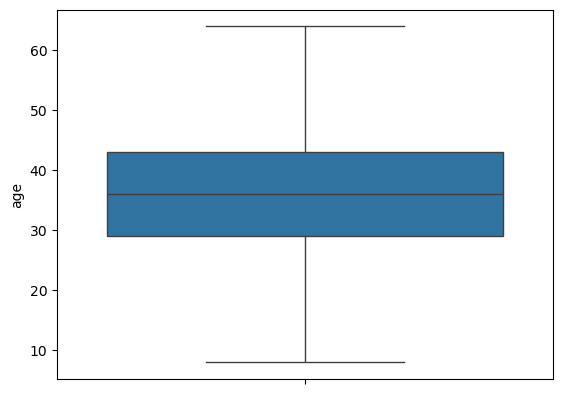

Axes(0.125,0.11;0.775x0.77)


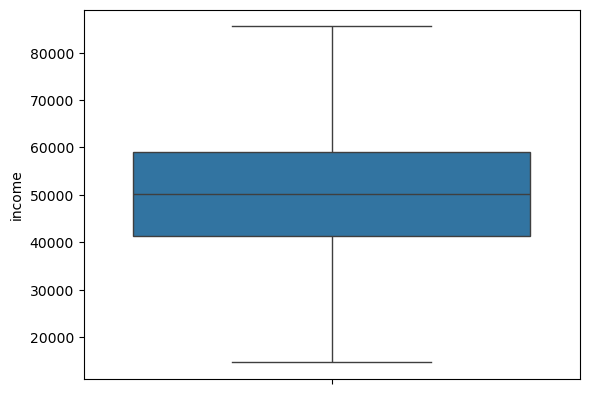

Axes(0.125,0.11;0.775x0.77)


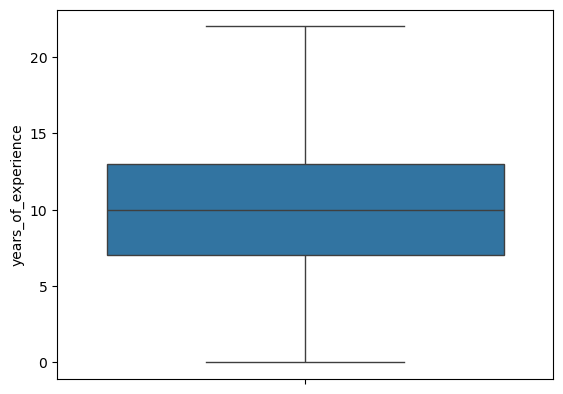

Axes(0.125,0.11;0.775x0.77)


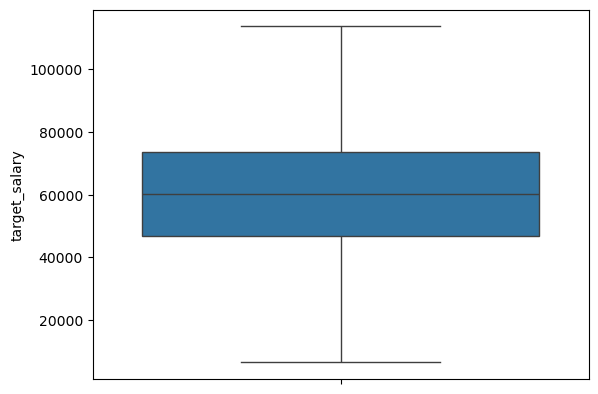

In [165]:
for i in cols:
    print(sns.boxplot(df2[i]))
    mp.show()

In [166]:
df2

,age,income,years_of_experience,education_level,hours_per_week,target_salary
0,40.0,39823.0,12.0,3,63.0,55156.0
1,34.0,45418.0,11.0,0,55.0,74080.0
2,41.0,41039.0,5.0,3,52.0,46084.0
3,50.0,51656.0,13.0,3,55.0,26355.0
4,33.0,50258.0,3.0,2,55.0,30921.0
...,...,...,...,...,...,...
9995,48.0,55817.0,7.0,0,34.0,71669.0
9996,15.0,70660.0,17.0,3,75.0,41931.0
9997,28.0,55675.0,7.0,1,57.0,24744.0
9998,40.0,75703.0,1.0,2,26.0,48441.0


In [169]:
x = df2.drop(columns = 'target_salary')
y = df2['target_salary']

In [170]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state = 70,test_size = 0.3)

In [175]:
scaler.fit(xtrain)
xtrainscaled = scaler.transform(xtrain)
xtestscaled = scaler.transform(xtest)
model.fit(xtrainscaled,ytrain)
linear = model.score(xtestscaled,ytest)

In [179]:
poly.fit(xtrain)
xtrainpoly = poly.transform(xtrain)
xtestpoly = poly.transform(xtest)
model2.fit(xtrainpoly,ytrain)
polys = model2.score(xtestpoly,ytest)

In [183]:
rd.fit(xtrainscaled,ytrain)
rds = rd.score(xtestscaled,ytest)
rds

-0.0009826211157628606

In [186]:
ls.fit(xtrainscaled,ytrain)
lss = ls.score(xtestscaled,ytest)
lss

-0.000977869313399049

In [188]:
print("Polynomial Features:",polys)
print("Lasso Regression:",lss)
print("Ridge Regression:",rds)
print("Linear Regression:",linear)

Polynomial Features: -0.0025942744493865355
Lasso Regression: -0.000977869313399049
Ridge Regression: -0.0009826211157628606
Linear Regression: -0.0009827872041561214
